In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #For some extra visualization features

In [2]:
df=pd.read_csv('kc_house_data.csv') # I am using the kc_house_data dataset

In [3]:
df.head() #Exploring the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


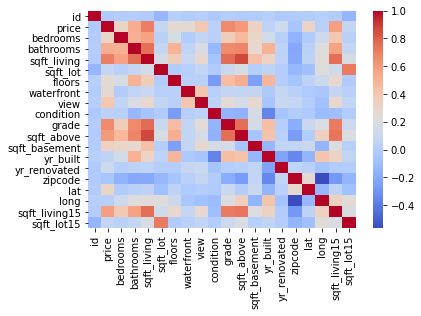

In [4]:
plt.figure() # Visualizing the data to see features that correlate. Can see that there is a strong corrlationship between square foot(sqft_living) and price 
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show() # Will use these parameters two parameters above to build the model

[1180 2570  770 1960 1680]
[221900. 538000. 180000. 604000. 510000.]
250
508706


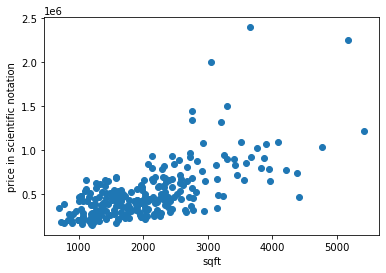

In [5]:
# Extracting the features I want to use
kvadmeter = df['sqft_living'] # Looks like this:   [(number in dataset) (square feet)]. 
pris      = df['price']       # Almost same here:  [(number in dataset) (price)]. 

x = np.array(kvadmeter[0:250]) # Reshaping to a vector, x is the independent variable --- Don't want to use entire dataset, therefore [0:250]
y = np.array(pris[0:250])      # Reshaping this also, y is the dependent variable. Target vector
print(x[0:5])
print(y[0:5])
plt.xlabel("sqft")
plt.ylabel("price in scientific notation")
plt.scatter(x, y) # Plotting the data to a graph to visualize the data I will be working with. Using scientific notation here. x-axis sqft and y-ax is price
print(len(x))
print(sum(x))

In [6]:
m = 0 #Beta0
c = 0 #Beta1

L  = 0.0000000004 #Learning rate. Important to not choose a too big rate
iterat = 1000 # iteratioins for gradient descent

n = float(len(x)) #Number of elements in x

cost_vec = [] # Storing values of the cost

for i in range(iterat): #Using gradient descent and storing the calculated loss for each epoch in a vector/list/array to be used for plotting
    y_pred = m*x + c #The predicted value
    der_m = (-2/n) * sum(x * (y - y_pred)) #The derivative with respect to Beta1
    der_c = (-2/n) * sum(y - y_pred)       #The derivative with respect to Beta0
    
    cost = sum([x**2 for x in (y - y_pred)]) / n #Cost function. Difference between predictions squared divided by length of set to get avg
    cost_vec.append(cost)
    #print(cost)
    
    m = m - L * der_m #Update B1
    c = c - L * der_c #Update B0
    #print(m, c)

print(m, c)

243.6320224106503 0.10360419641567051


<function matplotlib.pyplot.show(close=None, block=None)>

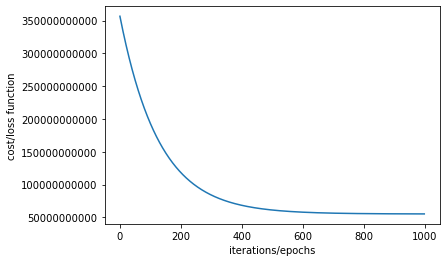

In [7]:
epochs = [x for x in range(iterat)]

fig, ax = plt.subplots()
ax.plot(epochs, cost_vec)
ax.ticklabel_format(style='plain') #Using this to get the whole number from the cost function instead of scientific notation
plt.xlabel("iterations/epochs")
plt.ylabel("cost/loss function")
plt.show # We se here that the loss function steadily decreases for every iteration until reaching a threshold at which it won't improve